Instalar librerías

In [ ]:
!pip install pandas google-cloud-bigquery scikit-learn

Realizar Autenticacion

In [ ]:
from google.colab import auth
auth.authenticate_user()

Conectar a Bigquery e importar librerias

In [ ]:
from google.cloud import bigquery
import pandas as pd


Define tu proyecto, dataset y tabla aqui

In [ ]:
project_id = "labproyecto2-hipotesis"
dataset = "Dataset"
table = "vista_consolidada_spotify_technical_info"

Crea un cliente de BigQuery autenticado para el proyecto especificado.

In [ ]:
client = bigquery.Client(project="labproyecto2-hipotesis")

Crear consulta con datos que necesitamos para nuestro dataframe

In [ ]:

query = """
SELECT bpm, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

Crear datarame

In [ ]:
df = client.query(query).to_dataframe()


Limpieza de datos:

In [ ]:
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df = df.dropna(subset=['bpm', 'streams_numerico'])
print(df.head())

   bpm  streams_numerico
0  135        1297026226
1   96        1355959075
2   95         786181836
3  173        1755214421
4  138        1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df[['bpm']]
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1890603295274906e+17
Coeficiente de determinación (R^2): -0.0003296256420366461
Intercepción: 518079372.14366764
Coeficiente: -14448.855151167847


Los resultados obtenidos del modelo de regresión lineal indican que el modelo no está funcionando bien y no es adecuado para predecir los "streams" basándose en el "bpm". Vamos a interpretar cada uno de estos resultados:

1.Error cuadrático medio (MSE):
3.1890603295274906
𝑒
+
17
3.1890603295274906e+17

2.El MSE mide la magnitud promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Un MSE tan grande sugiere que las predicciones están muy lejos de los valores reales, lo que indica un mal ajuste del modelo.

3.Coeficiente de determinación (R²):
−
0.0003296256420366461
−0.0003296256420366461

4.El R² mide la proporción de la varianza en la variable dependiente que es explicada por las variables independientes. Un R² negativo indica que el modelo es peor que un modelo que simplemente predice la media de la variable dependiente para todas las observaciones. En otras palabras, el modelo no tiene poder predictivo.

5.Intercepción:
518079372.14366764
518079372.14366764

Este es el valor de "streams" cuando el "bpm" es 0. Sin embargo, como los valores de bpm no pueden ser 0, esta intercepción no tiene un significado práctico directo pero es parte del cálculo del modelo.

6.Coeficiente:
−
14448.855151167847
−14448.855151167847

Este coeficiente indica que por cada incremento unitario en bpm, el "streams" disminuye en promedio en aproximadamente 14448.85 unidades. Dado que esto no parece razonable y el R² es negativo, esto también sugiere que el modelo no es adecuado.

Conclusión:

El modelo actual de regresión lineal no es adecuado para predecir los "streams" basándose en el "bpm". Esto se evidencia por el alto MSE y el valor negativo de R².
El coeficiente de "bpm" es negativo, lo que contradice la hipótesis inicial de que un mayor bpm está asociado con más streams.

GRAFICO DE DISPERSION LINEAL: HIPOTESIS 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [ ]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

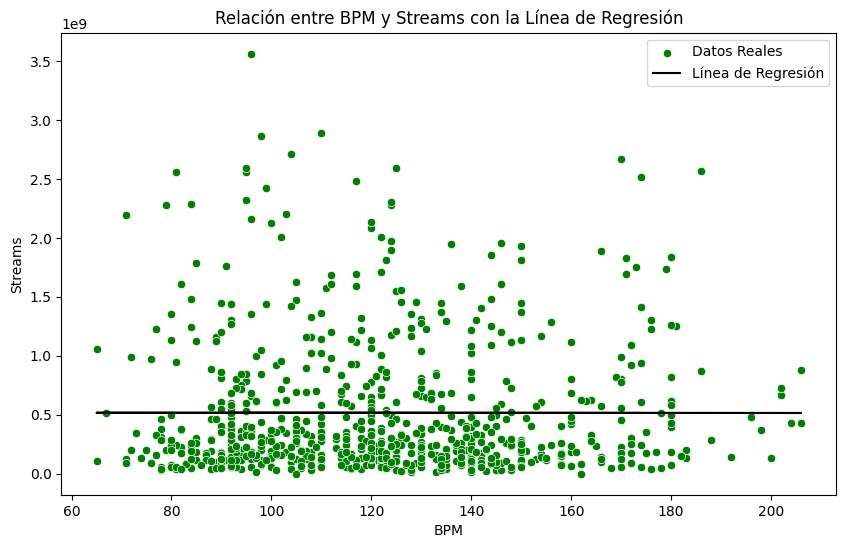

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['bpm'], y=y_train, label='Datos Reales', color='green')
plt.plot(X_train['bpm'], y_train_pred, color='black', label='Línea de Regresión')
plt.title('Relación entre BPM y Streams con la Línea de Regresión')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.legend()
plt.show()

HIPOTESIS 2: Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer

Spotify vs Deezer

Query para seleccionar datos a usar

In [ ]:
query = """
SELECT in_spotify_charts, in_deezer_charts
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])
print(df.head())

   in_spotify_charts  in_deezer_charts
0                110                 2
1                 53                 2
2                 42                 4
3                 43                 5
4                 62                 9


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df[['in_spotify_charts']]
y = df['in_deezer_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 21.5543438226604
Coeficiente de determinación (R^2): 0.4004457933944051
Intercepción: 0.5037406320271827
Coeficiente: 0.18002131752879133


Conclusión:

Relación Moderada:

El R² de 0.40 indica que hay una relación moderada entre in_spotify_charts y in_deezer_charts, pero no es lo suficientemente fuerte como para ser el único predictor de charts. Otros factores no considerados en el modelo pueden estar influyendo significativamente en los charts.

Modelo de Ajuste Moderado:

El MSE de 21.55 sugiere que aunque el modelo hace un trabajo razonable prediciendo charts, hay un margen considerable de error. Nuevamente, esto sugiere que hay variabilidad en los datos que no está siendo capturada por in_deezer_charts solo.

Relación Positiva:

El coeficiente positivo de 0.18 confirma que, en general, una mayor posicion en spotyfy  está asociado con una mayor posicion en deezer, lo cual respalda la hipótesis inicial.


GRAFICOS:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
y_train_pred = model.predict(X_train)

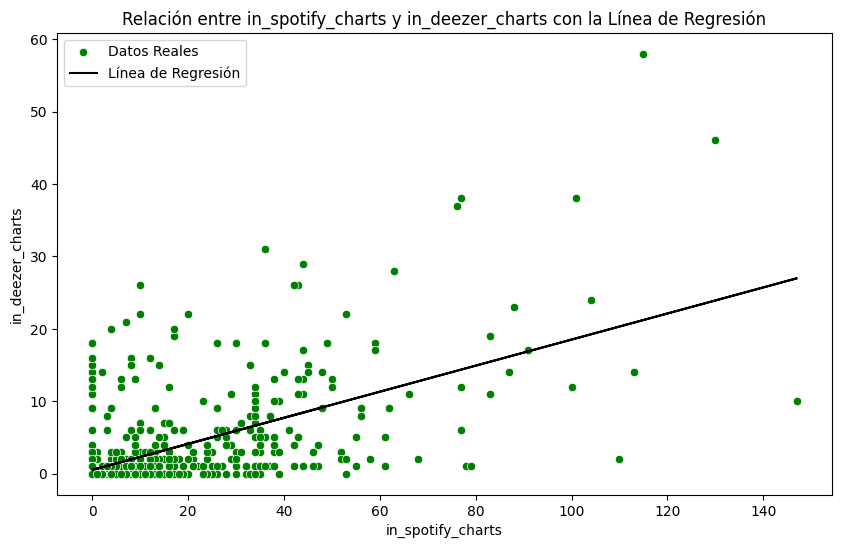

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['in_spotify_charts'], y=y_train, label='Datos Reales', color='green')
plt.plot(X_train['in_spotify_charts'], y_train_pred, color='black', label='Línea de Regresión')
plt.title('Relación entre in_spotify_charts y in_deezer_charts con la Línea de Regresión')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
plt.legend()
plt.show()

HIPOTESIS 2: Spotify vs Apple

In [ ]:
query = """
SELECT in_spotify_charts, in_apple_charts
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_apple_charts'] = pd.to_numeric(df['in_apple_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_apple_charts'])
print(df.head())

   in_spotify_charts  in_apple_charts
0                110               98
1                 53              123
2                 42              111
3                 43                2
4                 62                0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['in_spotify_charts']
y = df['in_apple_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 1976.8643296982843
Coeficiente de determinación (R^2): 0.24968577987854879
Intercepción: 34.845478791842766
Coeficiente: 1.4310541598256816


Concluion:
Relación Positiva:

El coeficiente positivo de 1.43 confirma que, en general, una mayor posicion en spotyfy está asociado con una mayor posicion en deezer, lo cual respalda la hipótesis inicial., pero la relación es debil como para ser un buen predictor por sí solo.

GRAFICOS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

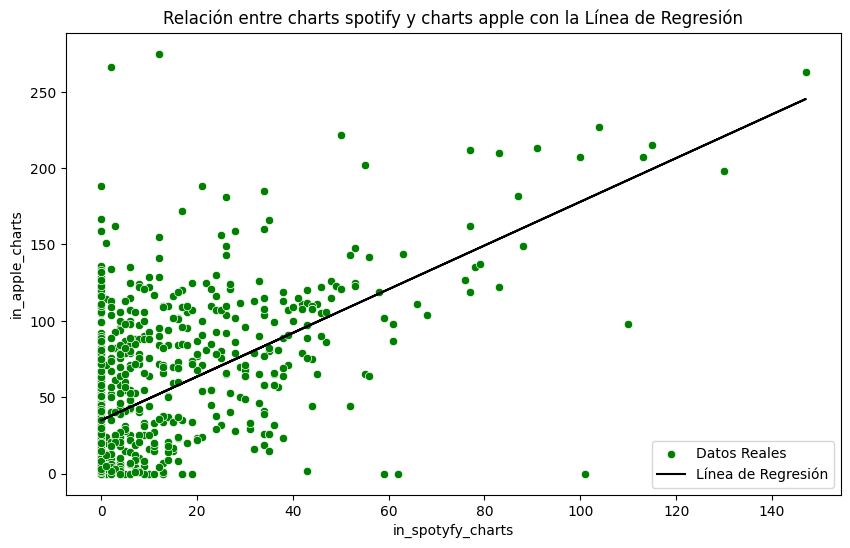

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre charts spotify y charts apple con la Línea de Regresión')
plt.xlabel('in_spotyfy_charts')
plt.ylabel('in_apple_charts')
plt.legend()
plt.show()

HIPOTESIS 2:
CHARTS IN SPOTIFY VS SHAZAM

In [ ]:
query = """
SELECT in_spotify_charts, in_shazam_charts
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_shazam_charts'])
print(df.head())

   in_spotify_charts  in_shazam_charts
0                110                73
1                 53                81
2                 42                82
3                 43                 0
4                 62                 0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['in_spotify_charts']
y = df['in_shazam_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(715,) (179,) (715,) (179,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(715, 1) (179, 1) (715,) (179,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 14735.855116718994
Coeficiente de determinación (R^2): 0.44691000277096626
Intercepción: -0.8709355811230566
Coeficiente: 4.905546289495083


Conclusión:

Relación Moderada:

El R² de 0.45 indica que hay una relación moderada entre "charts in Shazam" y "charts in Spotify", lo que sugiere que "charts in Spotify" es un predictor razonable del éxito en los charts de Shazam, pero hay otros factores importantes que también influyen.

Modelo de Ajuste Moderado:

El MSE de 14735.86 sugiere que aunque el modelo hace un trabajo razonable prediciendo "charts in Spotify", hay un margen considerable de error. Esto implica que el modelo no es muy preciso, pero ofrece una indicación útil.

Relación Positiva:

El coeficiente positivo de 4.91 confirma que, en general, un mejor desempeño en los "charts in spotify" está asociado con un mejor desempeño en los "charts in Shazam"

GRAFICA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

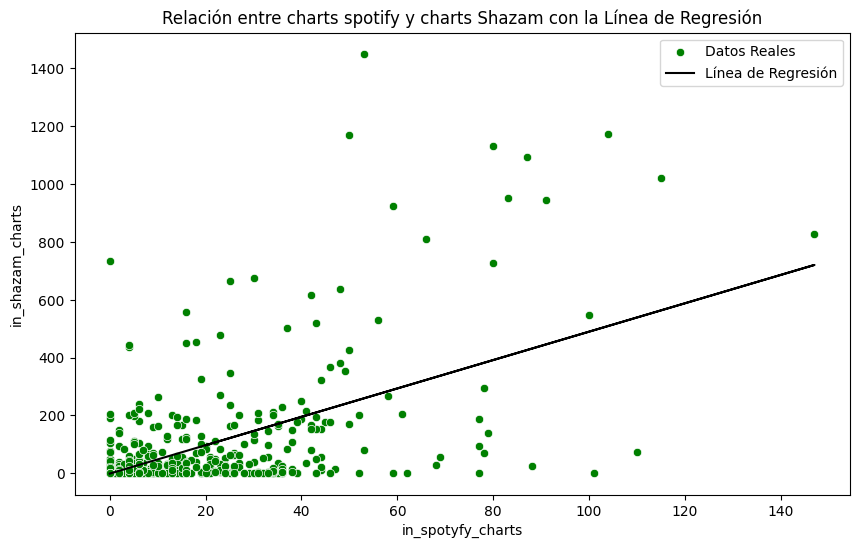

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre charts spotify y charts Shazam con la Línea de Regresión')
plt.xlabel('in_spotyfy_charts')
plt.ylabel('in_shazam_charts')
plt.legend()
plt.show()

HIPOTESIS 3:

La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams


Query para seleccionar datos a usar

In [ ]:
query = """
SELECT tot_part_playlist , track_id
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['tot_part_playlist'] = pd.to_numeric(df['tot_part_playlist'], errors='coerce')
df['track_id'] = pd.to_numeric(df['track_id'], errors='coerce')
df = df.dropna(subset=['tot_part_playlist', 'track_id'])
print(df.head())

   tot_part_playlist   track_id
0              13465  1406287.0
1              11998  3921634.0
2               8075  4796316.0
3              35607  4527090.0
4              38226  3126367.0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['track_id']
y = df['tot_part_playlist']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(754,) (189,) (754,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(754, 1) (189, 1) (754,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 46419481.613702826
Coeficiente de determinación (R^2): -0.0376493727365399
Intercepción: 5852.177006422099
Coeficiente: 1.6433101091349105e-05


Relación Débil o Inexistente: El coeficiente muy pequeño y el R^2 negativo indican que la presencia en playlists no explica significativamente la variabilidad en el número de streams.

GRAFICA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

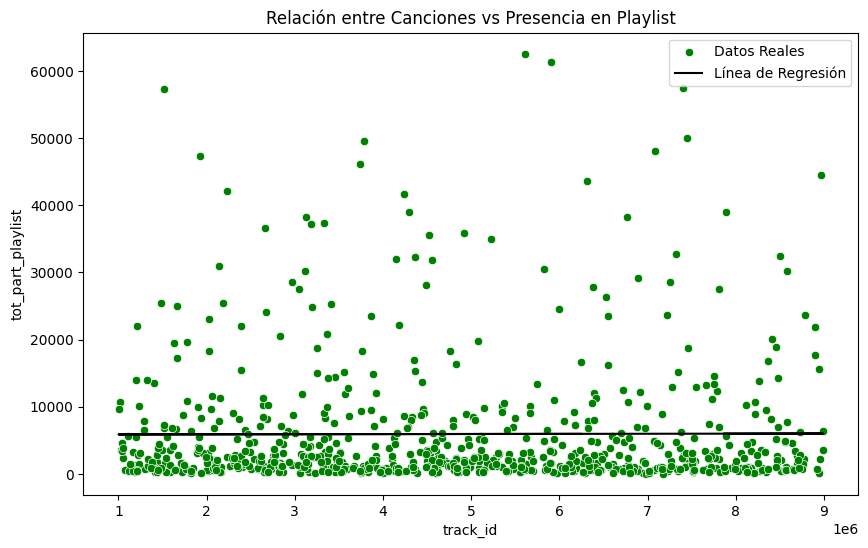

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Canciones vs Presencia en Playlist')
plt.xlabel('track_id')
plt.ylabel('tot_part_playlist')
plt.legend()
plt.show()

HIPOTESIS 4:

Los artistas con un mayor número de canciones en Spotify tienen más streams

In [ ]:
query = """
SELECT total_canciones,total_streams
FROM `labproyecto2-hipotesis.Dataset.vista_hipotesis4`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['total_canciones'] = pd.to_numeric(df['total_canciones'], errors='coerce')
df['total_streams'] = pd.to_numeric(df['total_streams'], errors='coerce')
df = df.dropna(subset=['total_canciones', 'total_streams'])
print(df.head())


   total_canciones  total_streams
0                2      266983330
1                1     1202722675
2                4     4508746590
3                1      838586769
4                1      118810253


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['total_canciones']
y = df['total_streams']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239,) (60,) (239,) (60,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 1) (60, 1) (239,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 1.377236569956644e+18
Coeficiente de determinación (R^2): 0.7537531924491054
Intercepción: 194858748.11261463
Coeficiente: 453769865.76784766


Fuerte Relación Positiva: El R^2 alto y el coeficiente grande indican que existe una fuerte relación positiva entre el número de canciones que un artista tiene en Spotify y el número de streams. Esto apoya la hipótesis de que los artistas con más canciones tienden a tener más streams.

GRAFICA:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

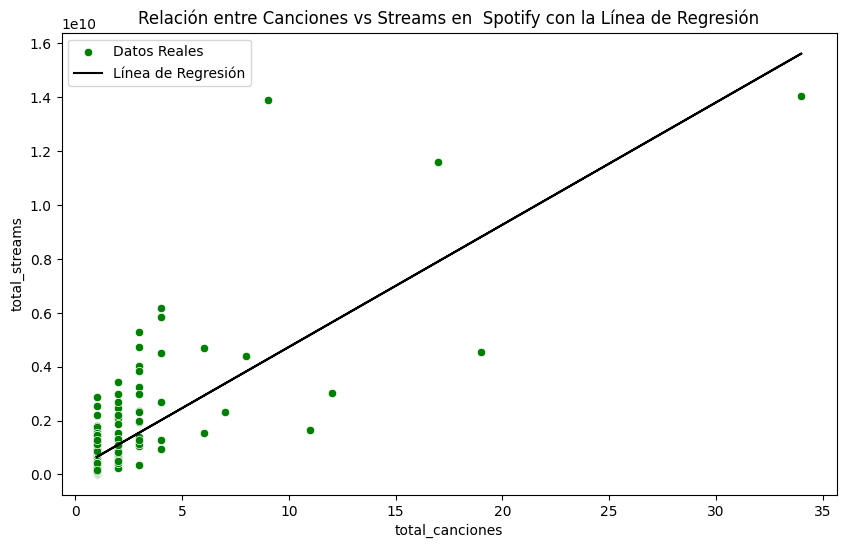

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Canciones vs Streams en  Spotify')
plt.xlabel('total_canciones')
plt.ylabel('total_streams')
plt.legend()
plt.show()

HIPOTESIS 5:

Las características de la canción influyen en el éxito en términos de streams en Spotify

Energy

In [ ]:
query = """
SELECT streams_numerico, `energy_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico', 'energy_%'])
print(df.head())

   streams_numerico  energy_%
0        1297026226        42
1        1355959075        68
2         786181836        79
3        1755214421        66
4        1592909789        62


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['energy_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.191199432101503e+17
Coeficiente de determinación (R^2): -0.0010006093977401598
Intercepción: 584343722.8663057
Coeficiente: -1060671.6164008593


GRAFICA:

Energy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

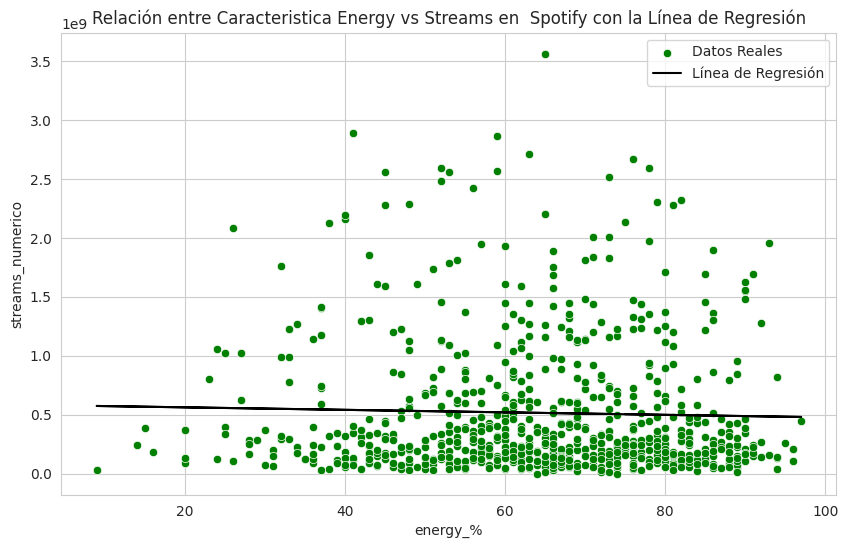

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica Energy vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('energy_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

BPM

In [ ]:
query = """
SELECT streams_numerico, `bpm`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df = df.dropna(subset=['streams_numerico','bpm'])
print(df.head())

   streams_numerico  bpm
0        1297026226  135
1        1355959075   96
2         786181836   95
3        1755214421  173
4        1592909789  138


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['bpm']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1890603295274906e+17
Coeficiente de determinación (R^2): -0.0003296256420366461
Intercepción: 518079372.14366764
Coeficiente: -14448.855151167847


GRAFICA: BPM

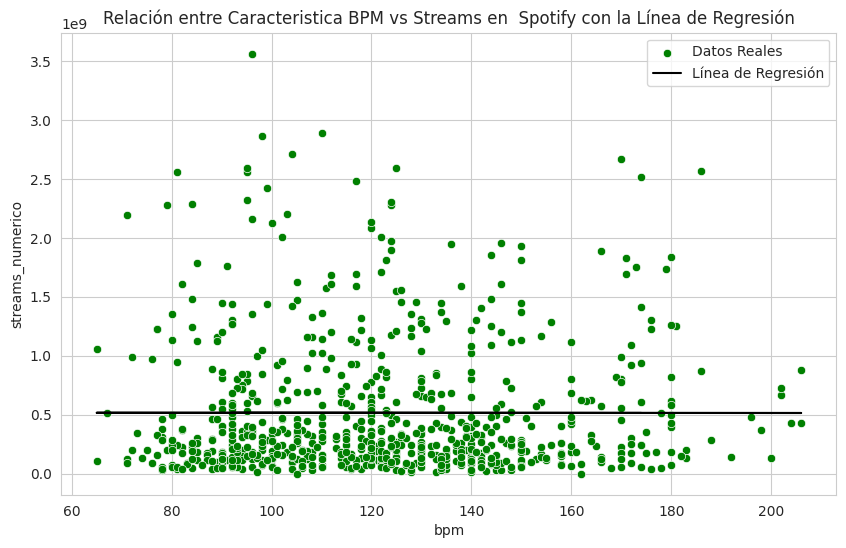

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica BPM vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('bpm')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Danceability_%

In [ ]:

query = """
SELECT streams_numerico, `danceability_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','danceability_%'])
print(df.head())

   streams_numerico  danceability_%
0        1297026226              48
1        1355959075              75
2         786181836              60
3        1755214421              43
4        1592909789              49


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['danceability_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.124828603648244e+17
Coeficiente de determinación (R^2): 0.01981828366786642
Intercepción: 754197652.8166625
Coeficiente: -3561913.4172532973


GRAFICA:

danceability_%

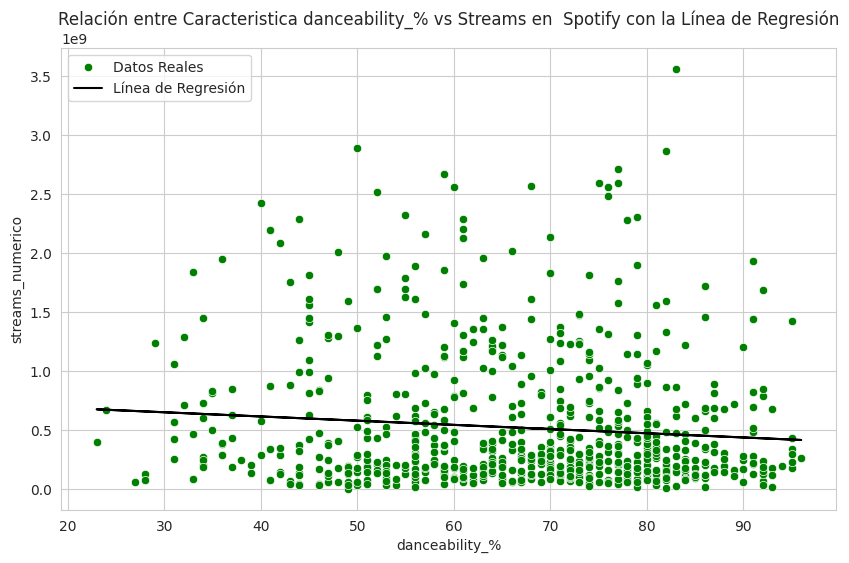

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica danceability_% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('danceability_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Valence_%

In [ ]:
query = """
SELECT streams_numerico, `valence_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','valence_%'])
print(df.head())

   streams_numerico  valence_%
0        1297026226         44
1        1355959075         57
2         786181836         48
3        1755214421         28
4        1592909789         42


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['valence_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.182035009291737e+17
Coeficiente de determinación (R^2): 0.00187404416514092
Intercepción: 566138289.9384496
Coeficiente: -971945.7250246599


GRAFICA:

valence_%

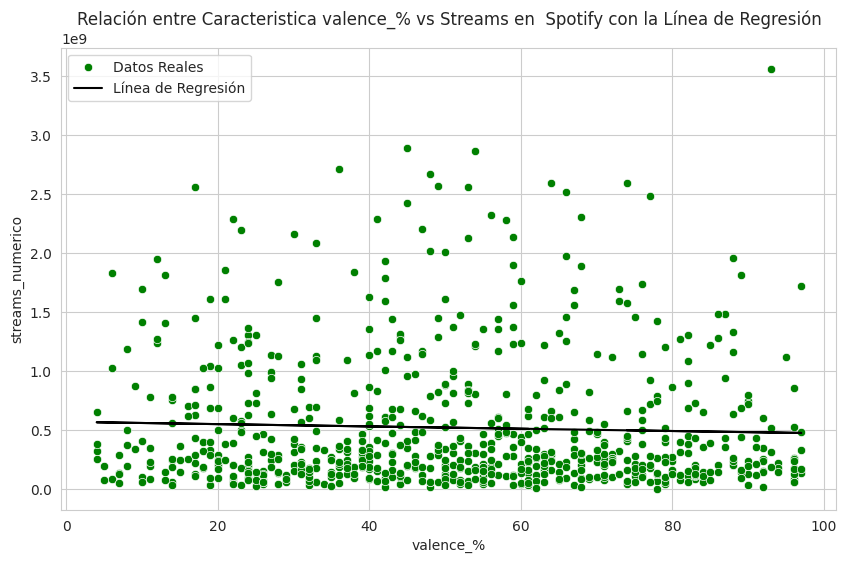

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica valence_% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('valence_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Acousticness_%

In [ ]:
query = """
SELECT streams_numerico, `acousticness_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['acousticness_%'] = pd.to_numeric(df['acousticness_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','acousticness_%'])
print(df.head())

   streams_numerico  acousticness_%
0        1297026226              12
1        1355959075               9
2         786181836               0
3        1755214421               0
4        1592909789               9


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['acousticness_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1889904031590746e+17
Coeficiente de determinación (R^2): -0.000307691463716786
Intercepción: 519052870.0753346
Coeficiente: -101639.24942977371


GRAFICA:

Acousticness_%'

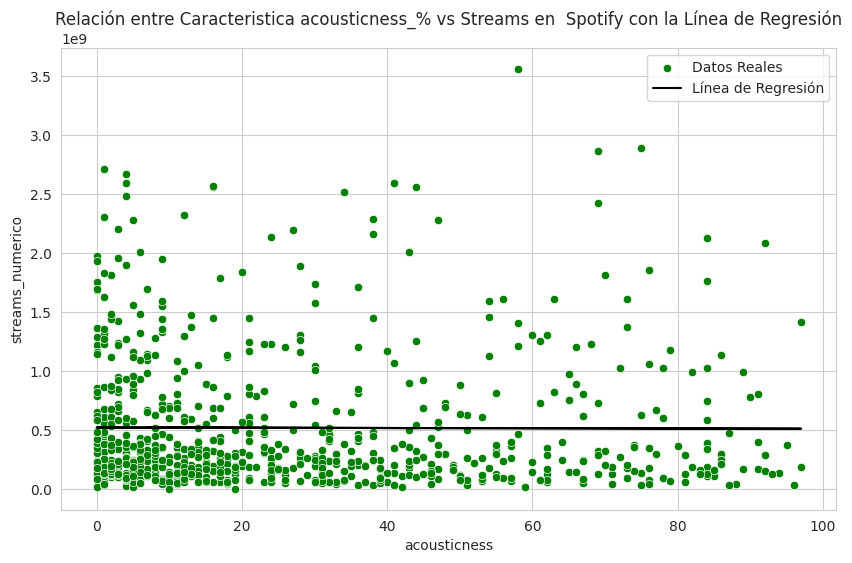

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica acousticness_% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('acousticness')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Instrumentalness_

In [ ]:
query = """
SELECT streams_numerico, `instrumentalness_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['instrumentalness_%'] = pd.to_numeric(df['instrumentalness_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','instrumentalness_%'])
print(df.head())

   streams_numerico  instrumentalness_%
0        1297026226                   2
1        1355959075                   0
2         786181836                   0
3        1755214421                   0
4        1592909789                   0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['instrumentalness_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.186896882065557e+17
Coeficiente de determinación (R^2): 0.0003489945049873766
Intercepción: 521574809.3676341
Coeficiente: -3009595.266891558


GRAFICA:

instrumentalness_%

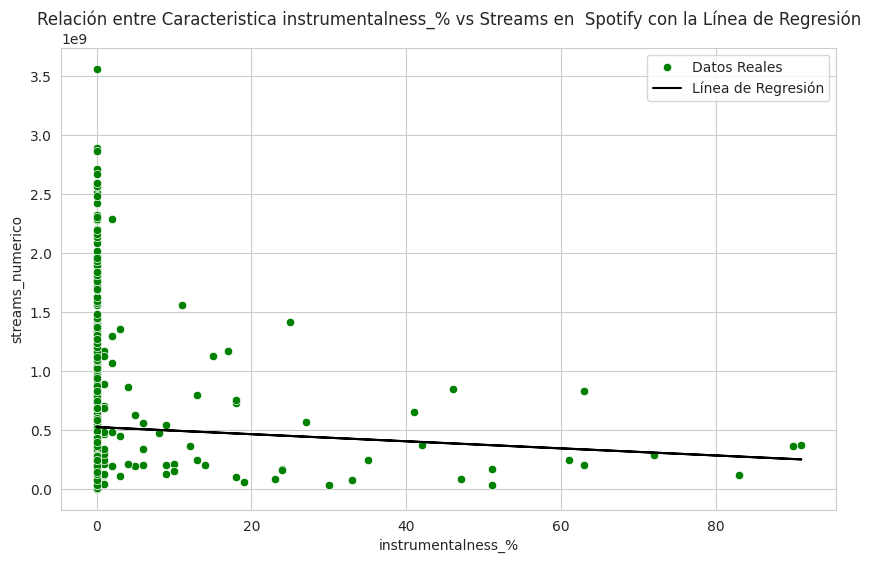

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica instrumentalness_% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('instrumentalness_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Liveness_%

In [ ]:
query = """
SELECT streams_numerico, `liveness_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['liveness_%'] = pd.to_numeric(df['liveness_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','liveness_%'])
print(df.head())

   streams_numerico  liveness_%
0        1297026226          11
1        1355959075          13
2         786181836          12
3        1755214421          23
4        1592909789          11


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['liveness_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.167159734862173e+17
Coeficiente de determinación (R^2): 0.006540051127653657
Intercepción: 542243879.0230006
Coeficiente: -1424267.01610165


GRAFICA:

liveness_%

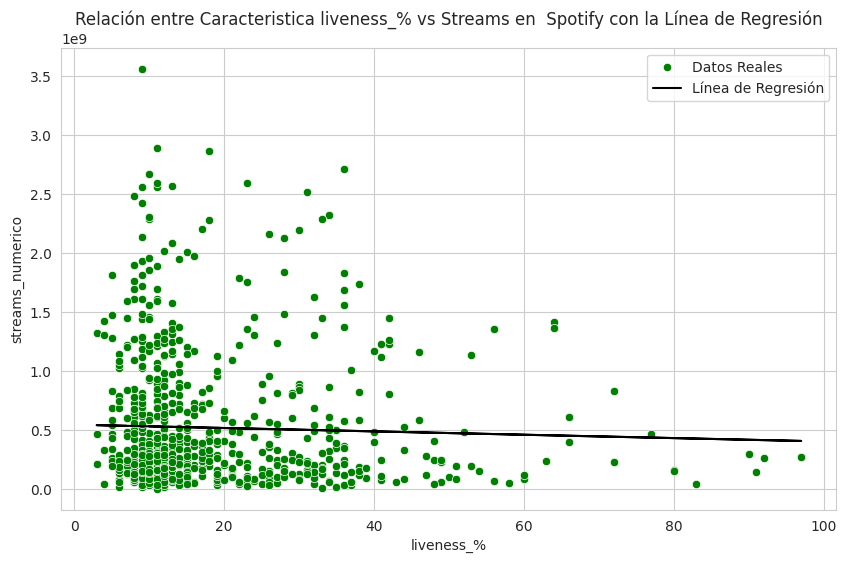

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica liveness_% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('liveness_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()

Speechiness_%

In [ ]:
query = """
SELECT streams_numerico, `speechiness_%`
FROM `labproyecto2-hipotesis.Dataset.vista_consolidada_spotify_technical_info`
"""

In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')
df['speechiness_%'] = pd.to_numeric(df['speechiness_%'], errors='coerce')
df = df.dropna(subset=['streams_numerico','speechiness_%'])
print(df.head())

   streams_numerico  speechiness_%
0        1297026226              3
1        1355959075              6
2         786181836              4
3        1755214421              3
4        1592909789              3


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['speechiness_%']
y = df['streams_numerico']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [ ]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1839496713280416e+17
Coeficiente de determinación (R^2): 0.0012734618744032478
Intercepción: 586839521.0596712
Coeficiente: -7004805.666278839


GRAFICA:

Speechiness_%

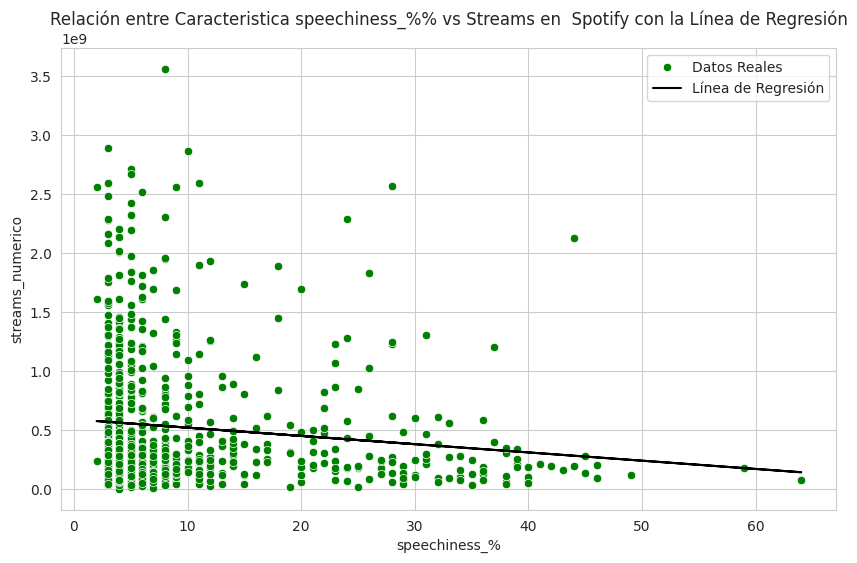

In [ ]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)

# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Relación entre Caracteristica speechiness_%% vs Streams en  Spotify con la Línea de Regresión')
plt.xlabel('speechiness_%')
plt.ylabel('streams_numerico')
plt.legend()
plt.show()